In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [60]:
import os
print(os.path.exists('C:/Users/DELL/Customer_Churn_Analysis/customer-churn-analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv'))


True


In [61]:
# Load dataset
file_path = 'C:/Users/DELL/Customer_Churn_Analysis/customer-churn-analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)


In [62]:
# Basic info
print(df.info())

# Summary stats
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Why?

Dataset Loading: Bring data into Python for analysis.
Head View: Check the first few rows to understand structure.

In [63]:
# Basic info
print(df.info())

# Summary stats
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Info: See data types and missing values.
Describe: Get numerical insights.

In [64]:
print(df.isnull().sum())
#Checking Null Values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [65]:
df = df.dropna()  # If few missing values
# OR
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\DELL\AppData\Local\Temp\ipykernel_44424\733296979.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


Remove columns that don’t contribute to churn prediction:

In [66]:
df = df.drop(['customerID'], axis=1)


Encoding Categorical Data
Convert text columns into numerical values:

In [67]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)


Missing Values: Clean dataset for accurate analysis.
Remove Columns: Eliminate irrelevant data.
Encoding: Machine learning models work with numbers, not text.

Analyze Churn Distribution
python



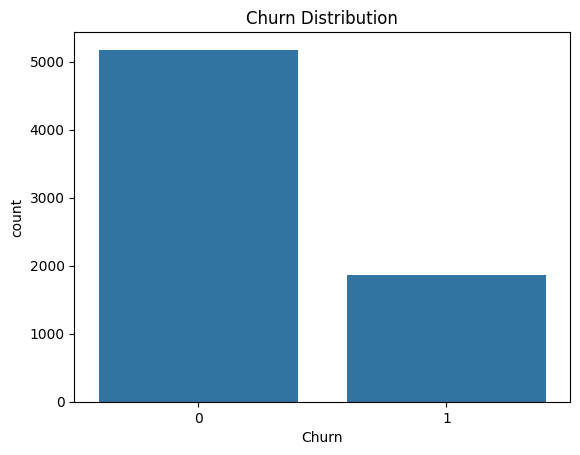

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


Feature Analysis
Check Correlation: The relation between different columns

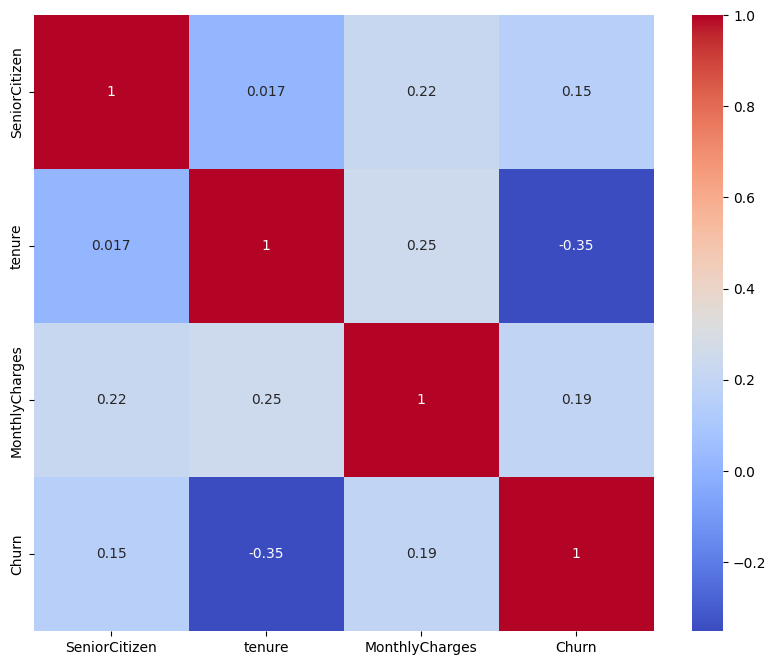

In [69]:
# Select only numeric columns and limit to a subset
df_small = df.select_dtypes(include='number').iloc[:, :20]  # First 20 numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df_small.corr(), annot=True, cmap='coolwarm')
plt.show()


Analyze specific features:

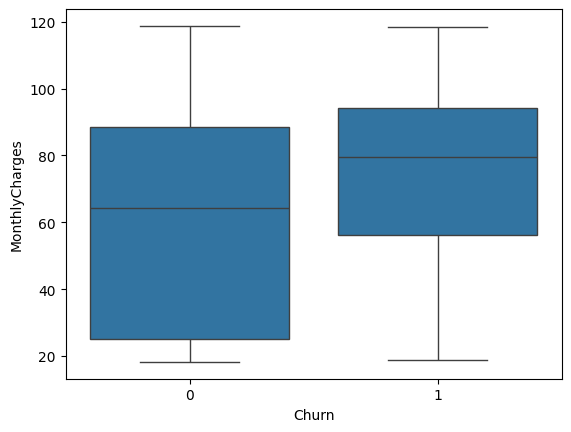

In [70]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_small)
plt.show()


Distribution Analysis: Understand churn percentages.
Correlation: Identify important factors influencing churn.

Build a Model
1)Split Data

In [71]:
from sklearn.model_selection import train_test_split

X = df_small.drop('Churn', axis=1)
y = df_small['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2)Build a logistic regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

3)Evaluate the model

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



Train-Test Split: Prepare data for training and evaluation.
Model Evaluation: Check performance using metrics.

Visualize Insights
Create visualizations highlighting important insights:

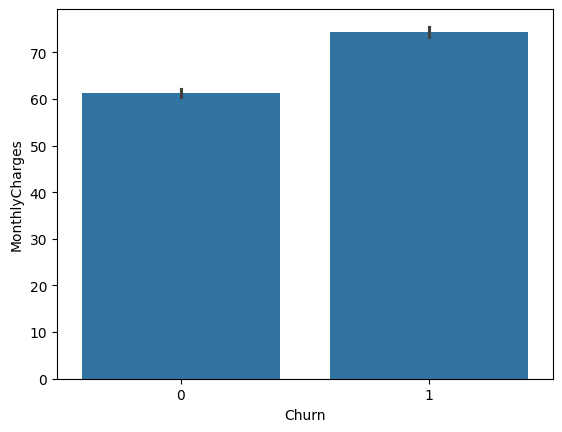

In [74]:
sns.barplot(x='Churn', y='MonthlyCharges', data=df_small)
plt.show()


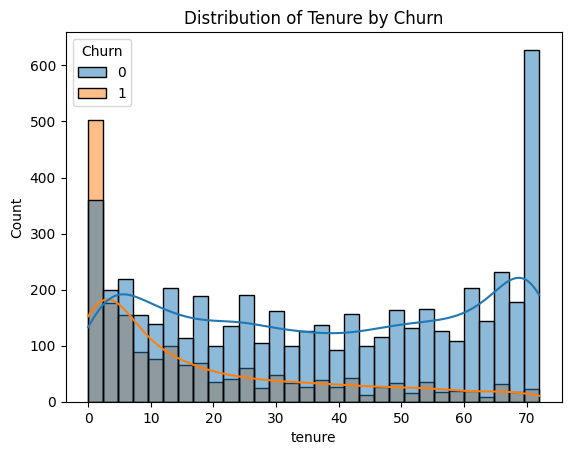

In [75]:
# Replace 'tenure' with a numeric column from your dataset
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure by Churn')
plt.show()


 Why?

Histograms show how customer tenure varies between churned and non-churned customers.
You may find insights like: shorter tenure correlates with higher churn.